In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import os
from google.colab import files
from PIL import Image
!pip install splitfolders
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement splitfolders (from versions: none)
ERROR: No matching distribution found for splitfolders


In [ ]:

!mkdir images

!cp /content/*.jpg /content/images/

mkdir: cannot create directory ‘images’: File exists


In [ ]:
preds = pd.read_excel('/content/predictions.xlsx')

preds.head

<bound method NDFrame.head of                   file  pred_label                                 pred_bbox
0   Image_AY1ZWZD5.jpg           0                                       NaN
1   Image_B2Z6BH7R.jpg           0                                       NaN
2   Image_YTXYC9BS.jpg           1    [0.56886, 0.476772, 0.35424, 0.580991]
3   Image_DBX2S91J.jpg           1     [0.63865, 0.198551, 0.4647, 0.298822]
4   Image_CPZW8OAO.jpg           1     [0.47552, 0.422169, 0.4088, 0.594699]
5   Image_CVRESW2M.jpg           1     [0.581975, 0.19309, 0.2755, 0.269598]
6   Image_T899W3BL.jpg           0                                       NaN
7   Image_2413FR0Y.jpg           0                                       NaN
8   Image_ACCFVSLA.jpg           1  [0.372436, 0.469481, 0.201818, 0.309672]
9   Image_23KAHAU5.jpg           0                                       NaN
10  Image_HSGPZGBX.jpg           1    [0.55142, 0.439925, 0.26788, 0.406175]
11  Image_GL1ABXZU.jpg           1  [0.404255,

In [ ]:
dataset_dir = "/content/images"  # Путь к директории с датасетом
output_dir = "/content/images_new"  # Путь к директории для сохранения приведенных изображений
target_size = (224, 224)  # Целевой размер изображений

# Создаем выходную директорию, если она не существует
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Получаем список файлов из датасета
file_list = os.listdir(dataset_dir)

# Цикл по каждому изображению в датасете
for file_name in file_list:
    # Проверяем, что файл является изображением
    if file_name.endswith(".jpg"):
        # Полный путь к текущему изображению
        image_path = os.path.join(dataset_dir, file_name)

        # Открываем изображение с помощью PIL
        image = Image.open(image_path)

        # Приводим изображение к целевому размеру
        resized_image = image.resize(target_size)

        # Полный путь к сохраняемому изображению
        output_path = os.path.join(output_dir, file_name)

        # Сохраняем приведенное изображение
        resized_image.save(output_path)

In [ ]:
ground_truth = pd.read_excel('/content/ground_truth.xlsx')

ground_truth.head()

,file,truth_label,truth_bbox
0,Image_AY1ZWZD5.jpg,0,NaN
1,Image_B2Z6BH7R.jpg,0,NaN
2,Image_YTXYC9BS.jpg,0,NaN
3,Image_DBX2S91J.jpg,1,"[0.678, 0.20457, 0.4364, 0.24793]"
4,Image_CPZW8OAO.jpg,1,"[0.48533, 0.426627, 0.45522, 0.64988]"


In [ ]:
labels = pd.merge(preds, ground_truth, on='file')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/content/images_new',
        x_col='file',
        y_col='truth_label',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 50 validated image filenames.


In [ ]:
labels.head(10)

,file,pred_label,pred_bbox,truth_label,truth_bbox
0,Image_AY1ZWZD5.jpg,0,NaN,0,NaN
1,Image_B2Z6BH7R.jpg,0,NaN,0,NaN
2,Image_YTXYC9BS.jpg,1,"[0.56886, 0.476772, 0.35424, 0.580991]",0,NaN
3,Image_DBX2S91J.jpg,1,"[0.63865, 0.198551, 0.4647, 0.298822]",1,"[0.678, 0.20457, 0.4364, 0.24793]"
4,Image_CPZW8OAO.jpg,1,"[0.47552, 0.422169, 0.4088, 0.594699]",1,"[0.48533, 0.426627, 0.45522, 0.64988]"
5,Image_CVRESW2M.jpg,1,"[0.581975, 0.19309, 0.2755, 0.269598]",1,"[0.586462, 0.200226, 0.300875, 0.298643]"
6,Image_T899W3BL.jpg,0,NaN,0,NaN
7,Image_2413FR0Y.jpg,0,NaN,0,NaN
8,Image_ACCFVSLA.jpg,1,"[0.372436, 0.469481, 0.201818, 0.309672]",1,"[0.665982, 0.322377, 0.203745, 0.356885]"
9,Image_23KAHAU5.jpg,0,NaN,0,NaN


In [ ]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   file         50 non-null     object
 1   pred_label   50 non-null     int64 
 2   pred_bbox    35 non-null     object
 3   truth_label  50 non-null     int64 
 4   truth_bbox   28 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.3+ KB


In [ ]:
labels.describe()

,pred_label,truth_label
count,50.00000,50.000000
mean,0.70000,0.560000
std,0.46291,0.501427
min,0.00000,0.000000
25%,0.00000,0.000000
50%,1.00000,1.000000
75%,1.00000,1.000000
max,1.00000,1.000000


In [ ]:
labels.isnull().sum()

file            0
pred_label      0
pred_bbox      15
truth_label     0
truth_bbox     22
dtype: int64

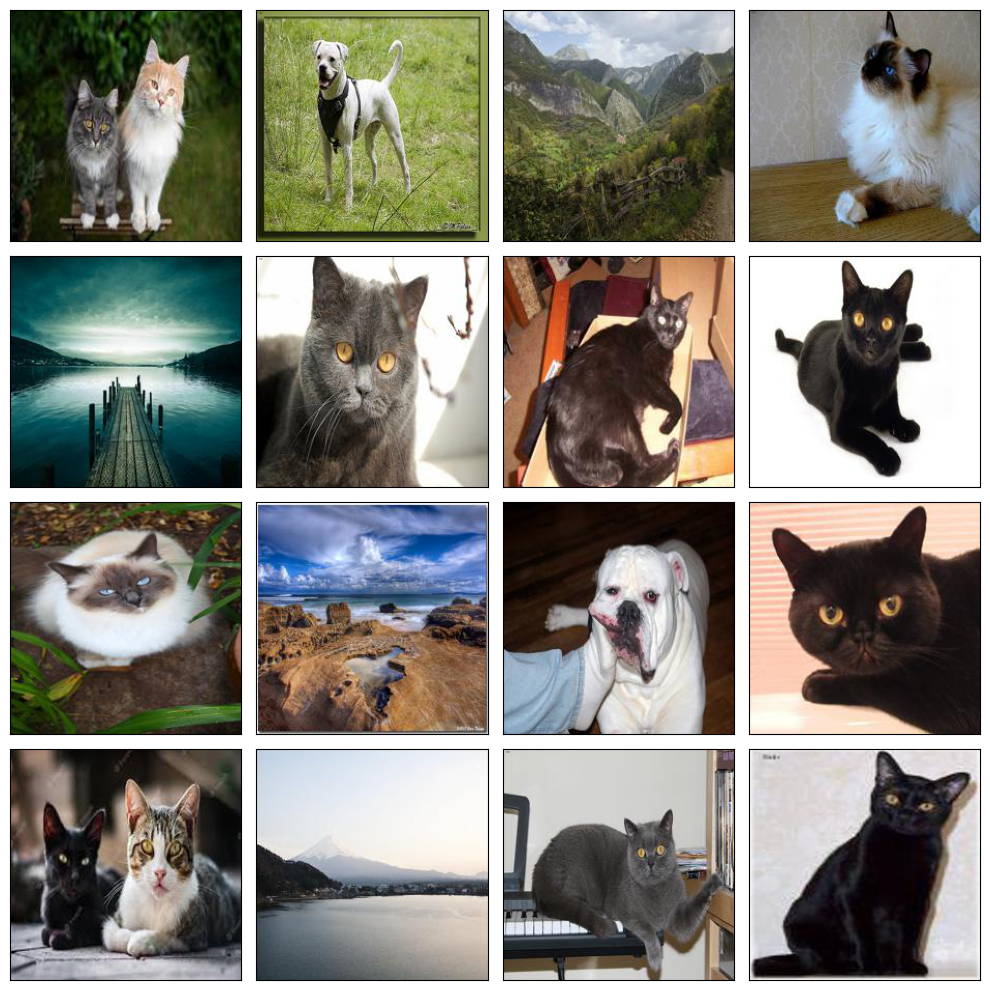

In [ ]:
features, target = next(train_gen_flow)

fig = plt.figure(figsize=(10,10))
for i in range(16):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

 # Вывод по первому этапу

Загрузили датасет, ознакомились с размером выборки и вывели первые 15 фотографий из набора данных.


Качество фотографий оставляет желать лучшего - яркость не приведена к единому показателю, присутствуют фотографии с ракурсом в профиль.

# Обучение модели

In [ ]:
!mkdir /content/img/
!mkdir /content/img/all_images
!cp /content/images_new/*.jpg /content/img/all_images

mkdir: cannot create directory ‘/content/img/’: File exists
mkdir: cannot create directory ‘/content/img/all_images’: File exists


In [ ]:
%pip install split-folders
import splitfolders


splitfolders.ratio('/content/img', '/content/images_final', ratio=(0.7, 0.2, 0.1), seed=18, group_prefix=None )

#определим размерность
input_shape = (224,224,3)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 50 files [00:00, 1432.22 files/s]


In [ ]:
# вручную определим функции precision, recall и f1 - score

import keras.backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1_score(y_true, y_pred):
    precision_val = precision(y_true, y_pred)
    recall_val = recall(y_true, y_pred)
    f1_score = 2 * ((precision_val * recall_val) / (precision_val + recall_val + K.epsilon()))
    return f1_score




In [ ]:
import numpy as np
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range=0.3
)

train_gen = train_datagen.flow_from_directory(
    'images_final/train',
    batch_size=3,
    target_size=(224, 224),
    shuffle=True,
    class_mode="categorical"
)

val_datagen = ImageDataGenerator(rescale=1./255)


val_gen = val_datagen.flow_from_directory(
    'images_final/val',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=3,
    shuffle=True)

# Генерация и сохранение аугментированных изображений
augmented_images = []
num_augmented_images = 10  # Количество аугментированных изображений, которые нужно сохранить

for i in range(num_augmented_images):
    batch = train_gen.next()
    augmented_images.extend(batch[0])

# Сохранение аугментированных изображений в файлы
save_dir = 'augmented_images'
os.makedirs(save_dir, exist_ok=True)

for i, image in enumerate(augmented_images):
    save_path = os.path.join(save_dir, f"augmented_{i}.jpg")
    image *= 255  # Масштабирование обратно к оригинальному диапазону значений
    image = image.astype(np.uint8)
    Image.fromarray(image).save(save_path)

# Проверка, появились ли аугментированные изображения
file_list = os.listdir(save_dir)

if len(file_list) > 0:
    print("Дополнительные аугментированные изображения появились.")
else:
    print("Дополнительные аугментированные изображения не появились.")



Found 40 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Дополнительные аугментированные изображения появились.


In [ ]:
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Model

base_model = ResNet50(weights='imagenet',
	include_top=False, pooling='max',
	input_shape=(224,224,3))

x = base_model.output
x = Dense(512)(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

predictions = Dense(1,
activation='sigmoid')(x)

model = Model(inputs=base_model.input,
outputs=predictions)




model.compile(optimizer = "adam",
             loss ='binary_crossentropy',
             metrics = ["accuracy"])



model.fit(train_gen, batch_size=100, verbose=1, epochs= 20,
                    validation_data=val_gen)

Epoch 1/20
14/14 [==============================] - 59s 3s/step - loss: 0.2151 - accuracy: 0.9750 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
14/14 [==============================] - 36s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
14/14 [==============================] - 38s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
14/14 [==============================] - 36s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
14/14 [==============================] - 36s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
14/14 [==============================] - 37s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
14/14 [==============================] - 37s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.